In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import datetime as dt
from collections import Counter

In [2]:
round2 = pd.read_json("round2_merged.json")
# round3.drop(["Unnamed: 0", "Unnamed: 0.1"],axis=1, inplace=True)
print round2.columns
# round3.head()
print len(round2)
round2_clean = round2[["id", "host_id", "host_response_rate", "host_acceptance_rate", 
                       "host_total_listings_count", "monthly_price", "instant_bookable", 
                       "room_type", "bucket_name", "discount_asked", "nightly_price", 
                       "decision", "price_agreed", "discount_agreed", "percent_agreed",
                       "calendars", "price_requested", "number_of_reviews", "host_is_superhost"
                      ,"beds"]]
round2_clean["room_type"].head(5)

Index([u'Unnamed: 0', u'account', u'actions', u'availability', u'beds',
       u'bucket_name', u'calendars', u'decision', u'discount_agreed',
       u'discount_asked', u'discount_obtained', u'host_acceptance_rate',
       u'host_id', u'host_is_superhost', u'host_name', u'host_response_rate',
       u'host_response_time', u'host_total_listings_count', u'host_url', u'id',
       u'instant_bookable', u'listing_url', u'minimum_nights',
       u'monthly_price', u'nightly_price', u'nightly_price_scraped',
       u'number_of_reviews', u'openings', u'percent_agreed', u'price_agreed',
       u'price_requested', u'response', u'room_type'],
      dtype='object')
226


0         Private room
1      Entire home/apt
10     Entire home/apt
100       Private room
101       Private room
Name: room_type, dtype: object

In [3]:
round3 = pd.read_json("round3_merged.json")
print round3.columns

round3_clean = round3[["id", "host_id", "host_response_rate", "host_acceptance_rate", 
                       "host_total_listings_count", "monthly_price", "instant_bookable", 
                       "room_type", "bucket_name", "discount_asked", "nightly_price", 
                       "decision", "price_agreed", "discount_agreed", "percent_agreed",
                       "calendars", "price_requested", "number_of_reviews", "host_is_superhost"
                      ,"beds"]]

print len(round3_clean)
dataframes= [round2_clean, round3_clean]

round3_clean = pd.concat(dataframes)
print len(round3_clean)

Index([u'Unnamed: 0', u'account', u'actions', u'availability', u'beds',
       u'bucket_name', u'calendars', u'decision', u'discount_agreed',
       u'discount_asked', u'discount_obtained', u'extra_people',
       u'guests_included', u'host_acceptance_rate', u'host_id',
       u'host_is_superhost', u'host_name', u'host_response_rate',
       u'host_response_time', u'host_total_listings_count', u'host_url', u'id',
       u'instant_bookable', u'listing_url', u'minimum_nights',
       u'monthly_price', u'nightly_plus_guest_price', u'nightly_price',
       u'nightly_price_scraped', u'number_of_reviews', u'openings',
       u'percent_agreed', u'price_agreed', u'price_requested', u'response',
       u'room_type'],
      dtype='object')
288
514


In [75]:
round3_clean.head()
round3_clean['room_type'].head()

0      1
1      1
10     0
100    0
101    0
Name: room_type, dtype: object

### Cleaning

In [5]:
#compute price median and price_std
calendar_price =  np.array([(np.median(calendar["price_USD"].values()), np.std(calendar["price_USD"].values())) 
                            for calendar in round3_clean["calendars"].values])
calendar_median_price = calendar_price[:,0]
calendar_price_std = calendar_price[:,1]
round3_clean["price_median"]=calendar_median_price
round3_clean["price_std"]=calendar_price_std/calendar_median_price
#cleaning
for index, row in round3_clean.iterrows():
    elem = str(row["host_acceptance_rate"])
    try:
        round3_clean["host_acceptance_rate"][index]= int( elem[:-1]) 
    except:
        round3_clean["host_acceptance_rate"][index]= int(-1) 
    
    elem2 = str(row["host_response_rate"])    
    try:
        round3_clean["host_response_rate"][index]= int( elem2[:-1]) 
    except:
        round3_clean["host_response_rate"][index]= int(-1) 
    
    #not used
    elem3 = str(row["monthly_price"])
    try:
        round3_clean["monthly_price"][index]= int( elem3[1:]) 
    except:
        round3_clean["monthly_price"][index]= int(-1) 
    
    #not used
    #round3_clean["nightly_price"][index] = int(row[nightly_price])

    if row["host_is_superhost"] == "t":
        round3_clean["host_is_superhost"][index] = 1
    if row["host_is_superhost"] == "f":
        round3_clean["host_is_superhost"][index] = 0
    
    if row["room_type"]==  "Private room":
        round3_clean["room_type"][index] = 1
    elif row["room_type"]=="Entire home/apt":
        round3_clean["room_type"][index] = 0
    else:
        round3_clean["room_type"][index] = 2
        
        
print len(round3_clean)
round3_clean["room_type"].head(20)


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

514


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0      1
1      1
10     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    1
109    1
11     1
110    0
111    0
112    0
113    0
114    0
115    0
Name: room_type, dtype: object

### creating 3 dataframes, one for accepted listing, one for denied and one for not answered. The "not_answer" is less important, but it will be shown anyway in the distributions

In [6]:
round3_accepted= round3_clean
round3_denied= round3_clean
round3_not_answer= round3_clean

round3_accepted= round3_accepted.loc[round3_accepted['decision']==1]
round3_denied= round3_denied.loc[round3_denied['decision']==0]
round3_not_answer= round3_not_answer.loc[round3_not_answer['decision']==-1]
negatives= [round3_denied, round3_not_answer]
round3_all_negative= pd.concat(negatives)


print len(round3_accepted)
print len(round3_denied)
print len(round3_not_answer)
print len(round3_all_negative)
print len(round3_clean)

round3_accepted.head(3)

113
157
244
401
514


,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,monthly_price,instant_bookable,room_type,bucket_name,discount_asked,...,price_agreed,discount_agreed,percent_agreed,calendars,price_requested,number_of_reviews,host_is_superhost,beds,price_median,price_std
1,8516966,15728249,100,100,1,-1,f,1,days3_weeks1,0.9,...,185,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",185,1,0,4,210,0.000000
10,1079511,4524825,-1,-1,1,-1,f,0,daysM_weeksM,0.9,...,170,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",150,15,0,1,160,0.020952
103,10451994,53848488,93,0,1,-1,f,0,daysM_weeks2,0.9,...,80,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",80,1,0,1,90,0.188228


### Studying distributions

In [128]:
#functions for plotting distributions:


def plot_distribution( current_population, label_input, color_input= 'b'):
    fig = plt.figure(figsize=[15,4])
    plt.subplot(1,2,1)
    plt.hist(current_population['price_median'].values,bins=20, color=color_input)
    plt.xlabel('Price median')
    plt.ylabel('Number of Listings')
    plt.title('Distribution of Median Price for ' + label_input )
    # plt.xlim([50,1400])
    #plt.xticks(np.linspace(0,700,25))

    plt.grid(False)
    plt.legend()

    plt.subplot(1,2,2)

    plt.hist(current_population['price_std'].values, bins=25, color=color_input)

    plt.xlabel('Std deviation')
    plt.ylabel('Number of Listings')
    plt.title('Distribution of Standard Deviation of Price for ' + label_input)

    plt.legend()
    plt.grid(False)
    print "Total element in "+label_input+": "+ str(len(current_population))
    print "Percent Listings with No Price Change at All for "+ label_input+": ", len(current_population[current_population['price_std']==0])*1./len(current_population)
    return

#Function for plotting population of continuous intervals, divided by ranges

def plot_interval(current_population,field, ranges, label_input ):
    #intervals=[]
    for i in range(len(ranges)-1):
        current_range= current_population[current_population[field].isin([ranges[i],ranges[i+1]] )]
        current_label= label_input + " range: [" +str(ranges[i])+","+str(ranges[i+1])+"]"
        plot_distribution(current_range,current_label )
    return


### Distribution of all/accepting/denying/nonanswering listings with no other filters

Total element in all listings: 514
Percent Listings with No Price Change at All for all listings:  0.29766536965
Total element in accepting listings: 113
Percent Listings with No Price Change at All for accepting listings:  0.256637168142
Total element in denying listings: 157
Percent Listings with No Price Change at All for denying listings:  0.28025477707
Total element in non answering listings: 244
Percent Listings with No Price Change at All for non answering listings:  0.327868852459


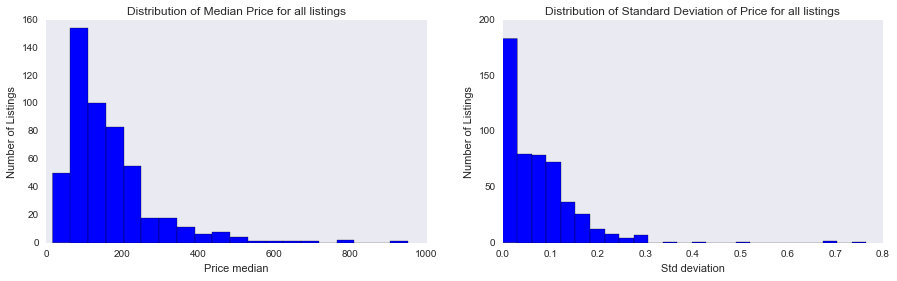

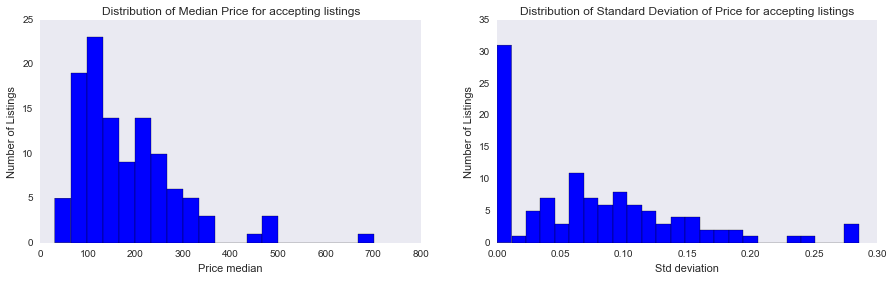

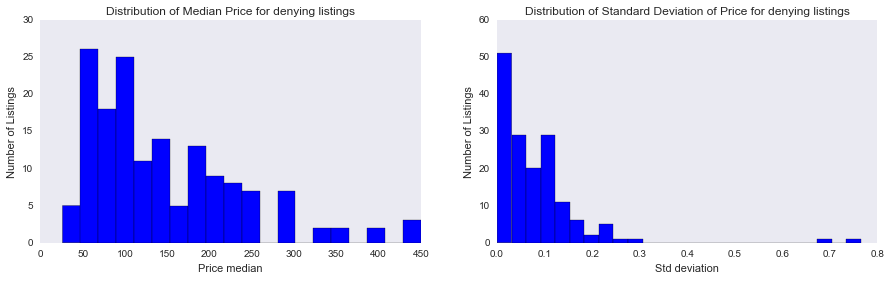

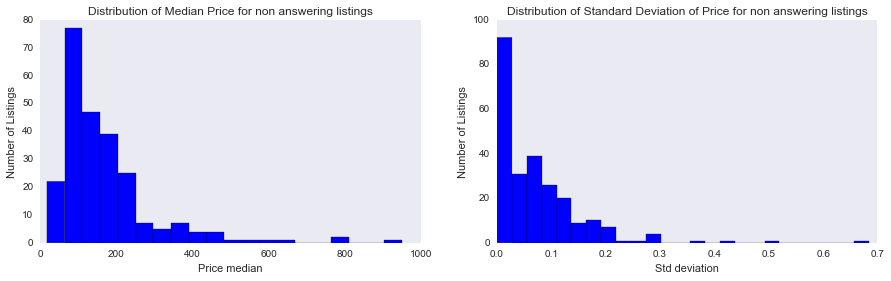

In [114]:
plot_distribution(round3_clean, "all listings")
plot_distribution(round3_accepted, "accepting listings")
plot_distribution(round3_denied, "denying listings")
plot_distribution(round3_not_answer, "non answering listings")

## Distributions and acceptance rate with respect to these parameters:
### - host_is_superhost
### - room_type
### - acceptance rate
### - response rate
### - beds

## (the functions built below are generic and can be used for any others  parameters, categorical or continuous)

#### Auxiliary function for acceptance rate

In [131]:
def number_of(dataframe, field, field_value):
    auxiliar=dataframe.loc[dataframe[field]==field_value]
    return len(auxiliar)


#n accepted, n denied etc. depending on the kind of field

def acceptance_rate(field, types= None):
    if types == None:        
        types= round3_clean[field].unique()
        print types
    round3_accepted_f = {}
    round3_denied_f={}
    round3_all_negative_f={}
    round3_not_answer_f={}

    for el in types:
        round3_accepted_f[el] = number_of (round3_accepted, field, el)
        round3_denied_f[el] = number_of (round3_denied, field, el)
        round3_all_negative_f[el] = number_of (round3_all_negative, field, el)
        round3_not_answer_f[el] = number_of (round3_not_answer, field, el)

    for el in types:
        try:
            print "Category: "+ field+ " "+ " type: "+ str(el)+ " percentage over all replied: " + str(float(round3_accepted_f[el])/(round3_denied_f[el]+ round3_accepted_f[el]))
            print "Category: "+ field+ " "+ " type: "+ str(el)+ " percentage over all contacted: " + str(float(round3_accepted_f[el])/(round3_all_negative_f[el]+ round3_accepted_f[el]))

        except ZeroDivisionError:
            print "division by 0"
            


            

def acceptance_rate_continuous(field, ranges):

    #types= round3_clean[field].unique()
    #print types
    round3_accepted_f = {}
    round3_denied_f={}
    round3_all_negative_f={}
    round3_not_answer_f={}

    for el in range(len(ranges)-1):
        round3_accepted_f[el] = len(round3_accepted[round3_accepted[field].isin([ranges[el],ranges[el+1]]) ])
        round3_denied_f[el] = len(round3_denied[round3_denied[field].isin([ranges[el],ranges[el+1]]) ])
        round3_all_negative_f[el] = len(round3_all_negative[round3_all_negative[field].isin([ranges[el],ranges[el+1]]) ])
        round3_not_answer_f[el] = len(round3_not_answer[round3_not_answer[field].isin([ranges[el],ranges[el+1]]) ])
        
        

    for el in range(len(ranges)-1):
        current_label= field + " range: [" +str(ranges[el])+","+str(ranges[el+1])+"]"

        try:
            print "Category: "+ field+ " "+ " type: "+ current_label+ " percentage over all replied: " + str(float(round3_accepted_f[el])/(round3_denied_f[el]+ round3_accepted_f[el]))
            print "Category: "+ field+ " "+ " type: "+ current_label+ " percentage over all contacted: " + str(float(round3_accepted_f[el])/(round3_all_negative_f[el]+ round3_accepted_f[el]))

        except ZeroDivisionError:
            print "division by 0"


In [116]:
round3['room_type'].unique()

array([u'Private room', u'Entire home/apt', u'Shared room'], dtype=object)

Total element in super hosts: 23
Percent Listings with No Price Change at All for super hosts:  0.347826086957
Total element in non super hosts: 491
Percent Listings with No Price Change at All for non super hosts:  0.295315682281


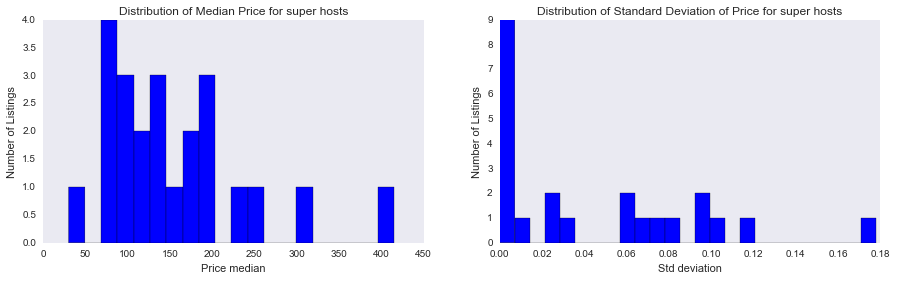

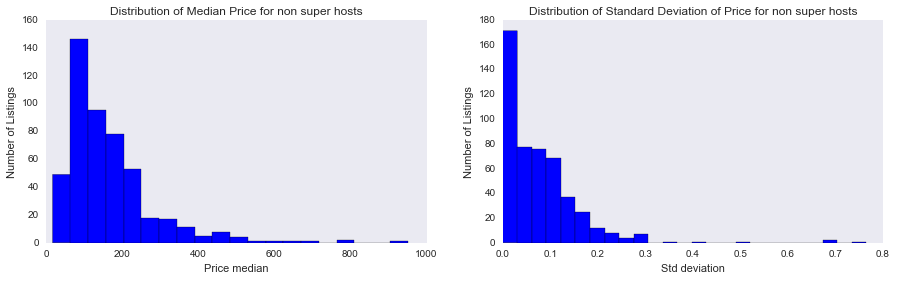

In [117]:
#Superhost
plot_distribution(round3_clean[round3_clean["host_is_superhost"]==1], "super hosts")
plot_distribution(round3_clean[round3_clean["host_is_superhost"]==0], "non super hosts")

In [118]:
acceptance_rate("host_is_superhost")

[0 1]
Category: host_is_superhost  type: 0 percentage over all replied: 0.415019762846
Category: host_is_superhost  type: 0 percentage over all contacted: 0.213849287169
Category: host_is_superhost  type: 1 percentage over all replied: 0.470588235294
Category: host_is_superhost  type: 1 percentage over all contacted: 0.347826086957


Total element in entire room: 309
Percent Listings with No Price Change at All for entire room:  0.278317152104
Total element in private room: 196
Percent Listings with No Price Change at All for private room:  0.326530612245
Total element in shared room: 9
Percent Listings with No Price Change at All for shared room:  0.333333333333


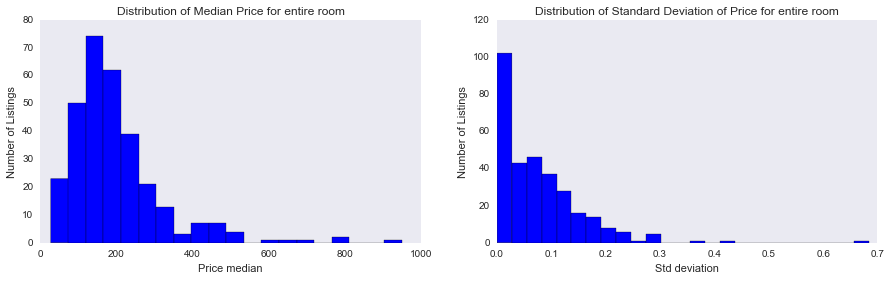

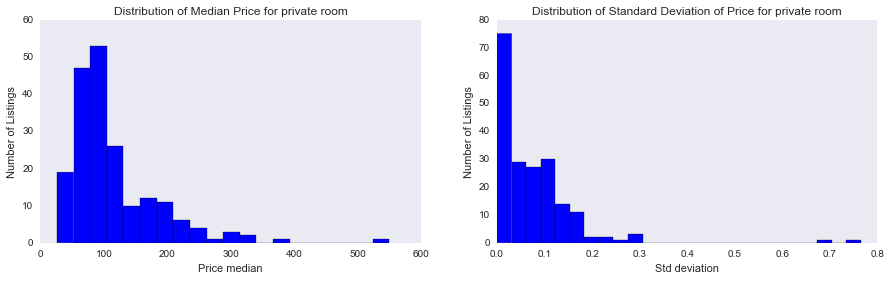

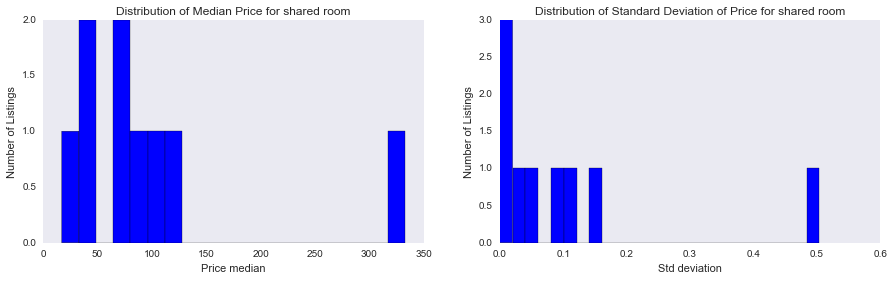

In [119]:
#Room type
plot_distribution(round3_clean[round3_clean["room_type"]==0], "entire room")
plot_distribution(round3_clean[round3_clean["room_type"]==1], "private room")
plot_distribution(round3_clean[round3_clean["room_type"]==2], "shared room")


In [120]:
acceptance_rate("room_type")

[1 0 2]
Category: room_type  type: 1 percentage over all replied: 0.394230769231
Category: room_type  type: 1 percentage over all contacted: 0.209183673469
Category: room_type  type: 0 percentage over all replied: 0.439024390244
Category: room_type  type: 0 percentage over all contacted: 0.233009708738
Category: room_type  type: 2 percentage over all replied: 0.0
Category: room_type  type: 2 percentage over all contacted: 0.0


In [121]:




#len(round3_clean[round3_clean['host_acceptance_rate'].isin([189,200])])


Total element in host acceptance rate range: [0,25]: 18
Percent Listings with No Price Change at All for host acceptance rate range: [0,25]:  0.222222222222
Total element in host acceptance rate range: [25,50]: 20
Percent Listings with No Price Change at All for host acceptance rate range: [25,50]:  0.55
Total element in host acceptance rate range: [50,75]: 27
Percent Listings with No Price Change at All for host acceptance rate range: [50,75]:  0.444444444444
Total element in host acceptance rate range: [75,100]: 254
Percent Listings with No Price Change at All for host acceptance rate range: [75,100]:  0.318897637795


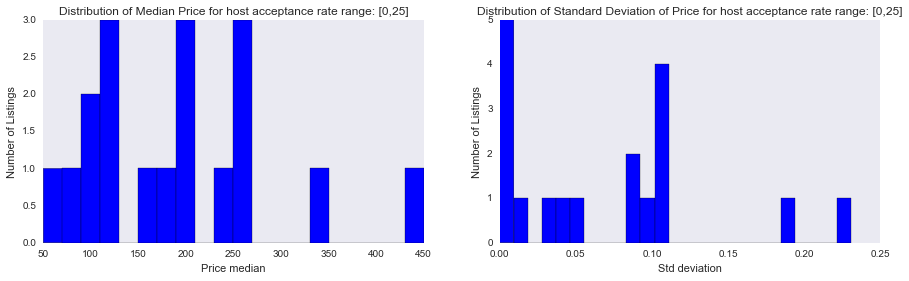

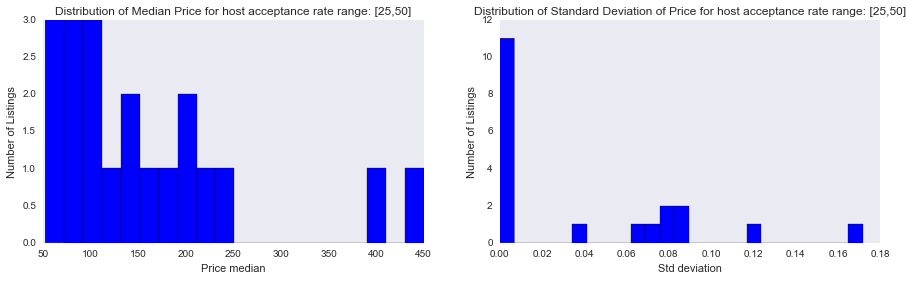

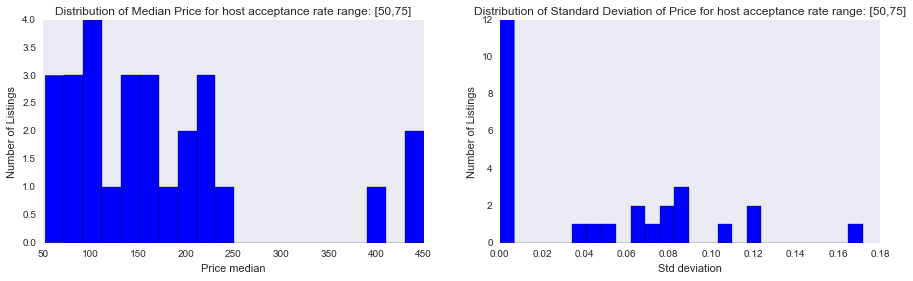

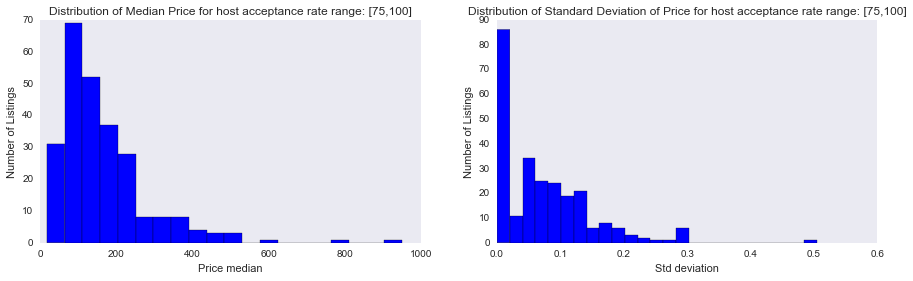

In [122]:
plot_interval(round3_clean,'host_acceptance_rate', range(0,101,25),"host acceptance rate"  )

In [123]:
acceptance_rate_continuous('host_acceptance_rate', range(0,101,25))


Category: host_acceptance_rate  type: host_acceptance_rate range: [0,25] percentage over all replied: 0.6
Category: host_acceptance_rate  type: host_acceptance_rate range: [0,25] percentage over all contacted: 0.333333333333
Category: host_acceptance_rate  type: host_acceptance_rate range: [25,50] percentage over all replied: 0.222222222222
Category: host_acceptance_rate  type: host_acceptance_rate range: [25,50] percentage over all contacted: 0.1
Category: host_acceptance_rate  type: host_acceptance_rate range: [50,75] percentage over all replied: 0.166666666667
Category: host_acceptance_rate  type: host_acceptance_rate range: [50,75] percentage over all contacted: 0.0740740740741
Category: host_acceptance_rate  type: host_acceptance_rate range: [75,100] percentage over all replied: 0.401515151515
Category: host_acceptance_rate  type: host_acceptance_rate range: [75,100] percentage over all contacted: 0.208661417323


Total element in host response rate range: [0,25]: 2
Percent Listings with No Price Change at All for host response rate range: [0,25]:  0.0
Total element in host response rate range: [25,50]: 6
Percent Listings with No Price Change at All for host response rate range: [25,50]:  0.333333333333
Total element in host response rate range: [50,75]: 11
Percent Listings with No Price Change at All for host response rate range: [50,75]:  0.454545454545
Total element in host response rate range: [75,100]: 263
Percent Listings with No Price Change at All for host response rate range: [75,100]:  0.32319391635


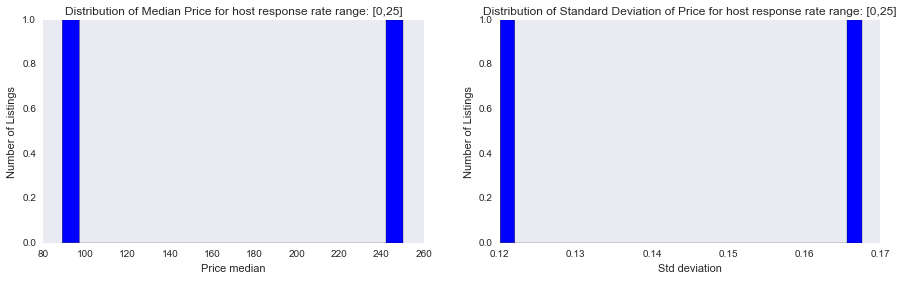

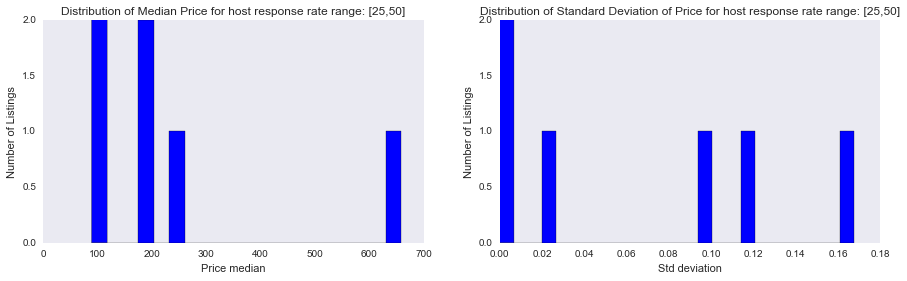

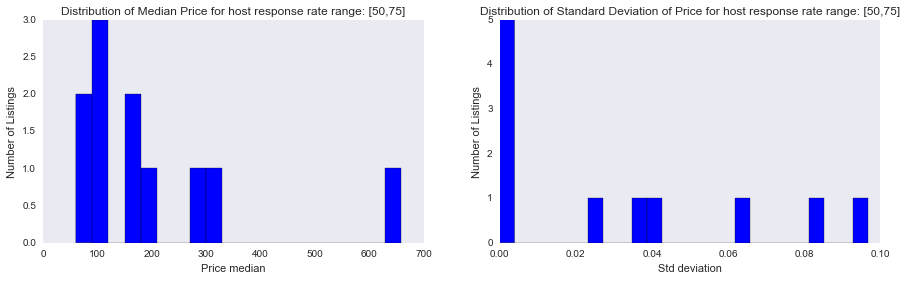

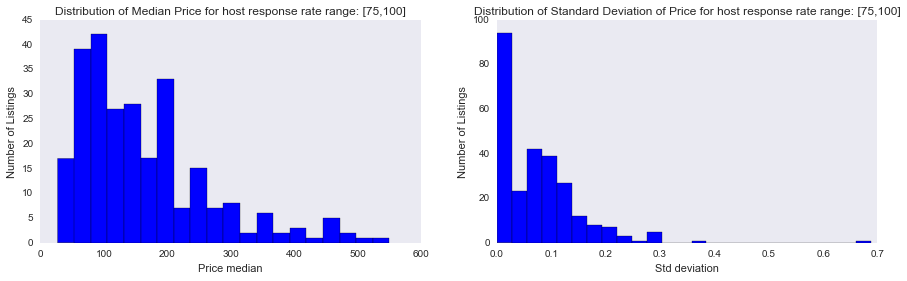

In [124]:
plot_interval(round3_clean,'host_response_rate', range(0,101,25),"host response rate"  )

In [125]:
acceptance_rate_continuous('host_response_rate', range(0,101,25))


Category: host_response_rate  type: host_response_rate range: [0,25] percentage over all replied: 0.0
Category: host_response_rate  type: host_response_rate range: [0,25] percentage over all contacted: 0.0
Category: host_response_rate  type: host_response_rate range: [25,50] percentage over all replied: 0.0
Category: host_response_rate  type: host_response_rate range: [25,50] percentage over all contacted: 0.0
Category: host_response_rate  type: host_response_rate range: [50,75] percentage over all replied: 0.0
Category: host_response_rate  type: host_response_rate range: [50,75] percentage over all contacted: 0.0
Category: host_response_rate  type: host_response_rate range: [75,100] percentage over all replied: 0.414285714286
Category: host_response_rate  type: host_response_rate range: [75,100] percentage over all contacted: 0.220532319392


Total element in beds  range: [0,1]: 305
Percent Listings with No Price Change at All for beds  range: [0,1]:  0.311475409836
Total element in beds  range: [1,2]: 444
Percent Listings with No Price Change at All for beds  range: [1,2]:  0.304054054054
Total element in beds  range: [2,3]: 180
Percent Listings with No Price Change at All for beds  range: [2,3]:  0.266666666667
Total element in beds  range: [3,4]: 58
Percent Listings with No Price Change at All for beds  range: [3,4]:  0.206896551724
Total element in beds  range: [4,5]: 23
Percent Listings with No Price Change at All for beds  range: [4,5]:  0.304347826087
Total element in beds  range: [5,6]: 10
Percent Listings with No Price Change at All for beds  range: [5,6]:  0.5
Total element in beds  range: [6,7]: 4
Percent Listings with No Price Change at All for beds  range: [6,7]:  0.5
Total element in beds  range: [7,8]: 1
Percent Listings with No Price Change at All for beds  range: [7,8]:  0.0
Total element in beds  range: [8

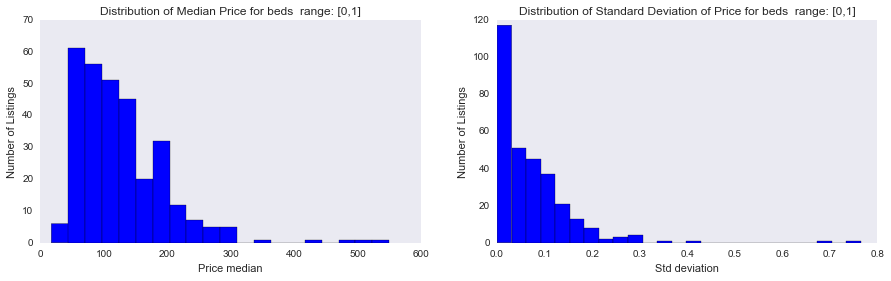

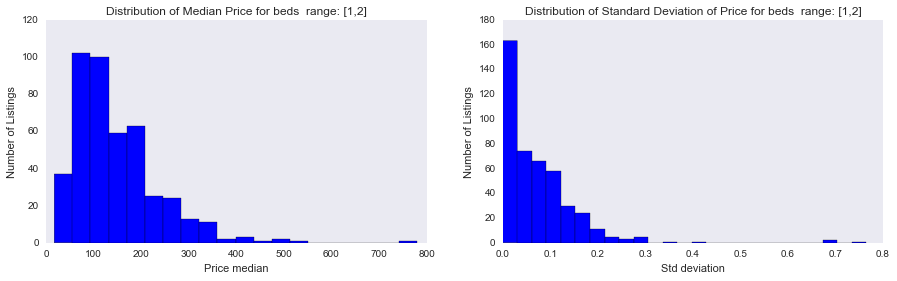

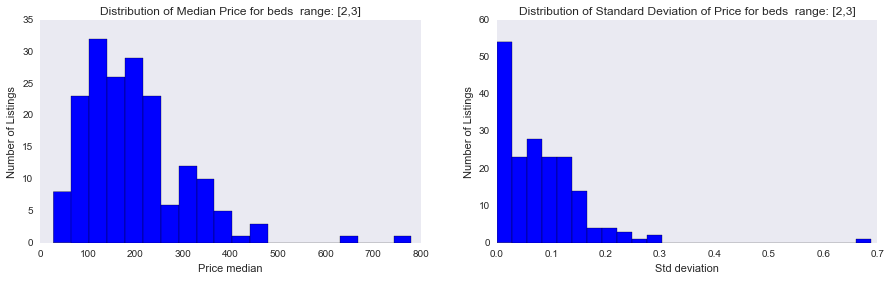

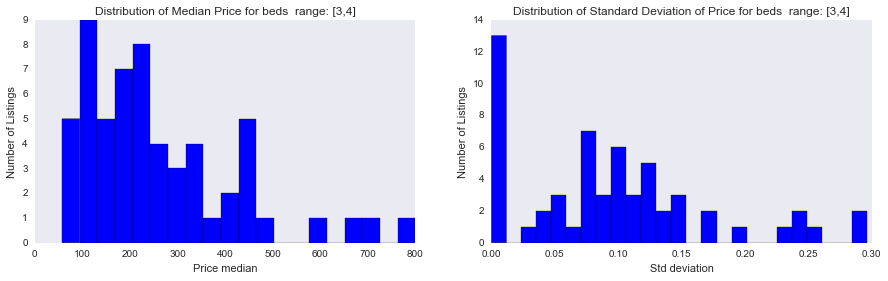

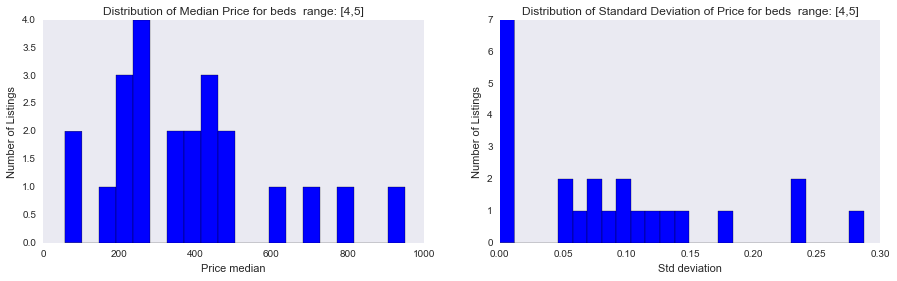

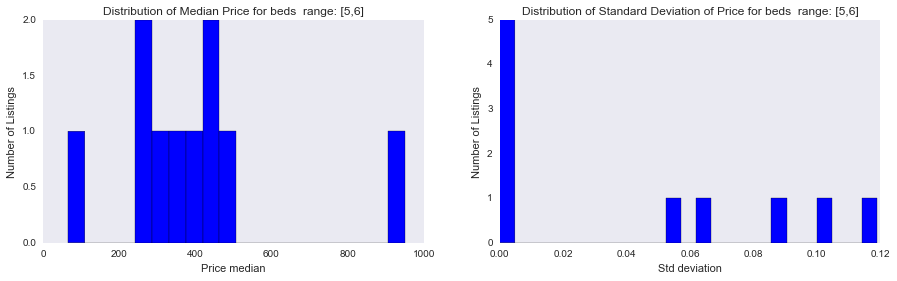

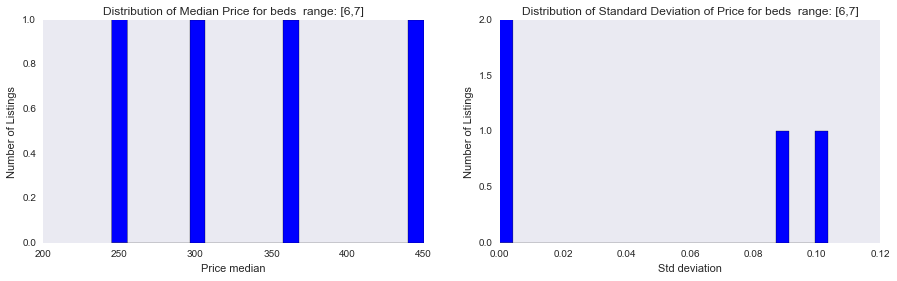

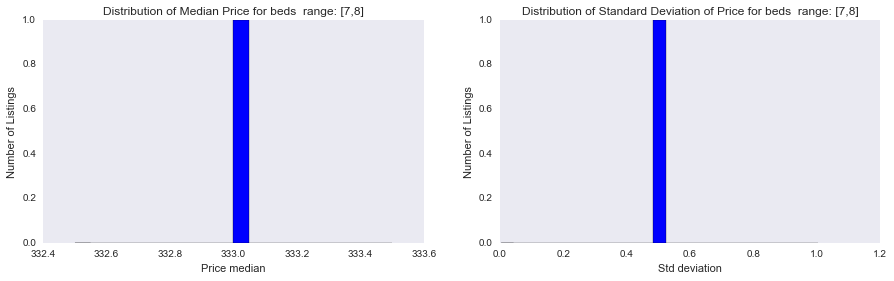

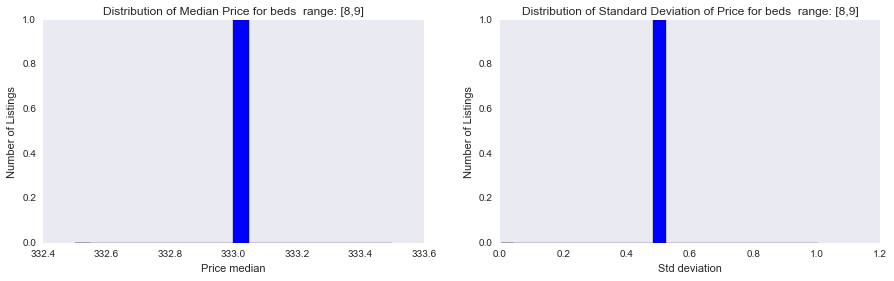

In [126]:
plot_interval(round3_clean,'beds', range(0,10,1),"beds "  )

In [127]:
acceptance_rate("beds")

[ 1  4  2  3  8 10  5  6]
Category: beds  type: 1 percentage over all replied: 0.388535031847
Category: beds  type: 1 percentage over all contacted: 0.2
Category: beds  type: 4 percentage over all replied: 0.555555555556
Category: beds  type: 4 percentage over all contacted: 0.294117647059
Category: beds  type: 2 percentage over all replied: 0.424657534247
Category: beds  type: 2 percentage over all contacted: 0.223021582734
Category: beds  type: 3 percentage over all replied: 0.423076923077
Category: beds  type: 3 percentage over all contacted: 0.268292682927
division by 0
division by 0
Category: beds  type: 5 percentage over all replied: 1.0
Category: beds  type: 5 percentage over all contacted: 0.333333333333
Category: beds  type: 6 percentage over all replied: 1.0
Category: beds  type: 6 percentage over all contacted: 0.75


## Orphan days and weeks in advance

In [132]:
#orphan 1 day

acceptance_rate('bucket_name', ["days1_weeks1","days1_weeks2","days1_weeksM"])


Category: bucket_name  type: days1_weeks1 percentage over all replied: 0.266666666667
Category: bucket_name  type: days1_weeks1 percentage over all contacted: 0.0952380952381
Category: bucket_name  type: days1_weeks2 percentage over all replied: 0.541666666667
Category: bucket_name  type: days1_weeks2 percentage over all contacted: 0.302325581395
Category: bucket_name  type: days1_weeksM percentage over all replied: 0.44
Category: bucket_name  type: days1_weeksM percentage over all contacted: 0.255813953488


In [133]:
#orphan 2 day

acceptance_rate('bucket_name', ["days2_weeks1","days2_weeks2","days2_weeksM"])


Category: bucket_name  type: days2_weeks1 percentage over all replied: 0.423076923077
Category: bucket_name  type: days2_weeks1 percentage over all contacted: 0.261904761905
Category: bucket_name  type: days2_weeks2 percentage over all replied: 0.52
Category: bucket_name  type: days2_weeks2 percentage over all contacted: 0.302325581395
Category: bucket_name  type: days2_weeksM percentage over all replied: 0.346153846154
Category: bucket_name  type: days2_weeksM percentage over all contacted: 0.209302325581


In [134]:
#orphan 3 day

acceptance_rate('bucket_name', ["days3_weeks1","days3_weeks2","days3_weeksM"])


Category: bucket_name  type: days3_weeks1 percentage over all replied: 0.315789473684
Category: bucket_name  type: days3_weeks1 percentage over all contacted: 0.139534883721
Category: bucket_name  type: days3_weeks2 percentage over all replied: 0.4375
Category: bucket_name  type: days3_weeks2 percentage over all contacted: 0.162790697674
Category: bucket_name  type: days3_weeksM percentage over all replied: 0.541666666667
Category: bucket_name  type: days3_weeksM percentage over all contacted: 0.302325581395


In [135]:
# non orphan

acceptance_rate('bucket_name', ["daysM_weeks1","daysM_weeks2","daysM_weeksM"])


Category: bucket_name  type: daysM_weeks1 percentage over all replied: 0.409090909091
Category: bucket_name  type: daysM_weeks1 percentage over all contacted: 0.209302325581
Category: bucket_name  type: daysM_weeks2 percentage over all replied: 0.407407407407
Category: bucket_name  type: daysM_weeks2 percentage over all contacted: 0.255813953488
Category: bucket_name  type: daysM_weeksM percentage over all replied: 0.285714285714
Category: bucket_name  type: daysM_weeksM percentage over all contacted: 0.139534883721


In [136]:
#1 week in advance
acceptance_rate('bucket_name', ["days1_weeks1","days2_weeks1","days3_weeks1", "daysM_weeks1"])

    

Category: bucket_name  type: days1_weeks1 percentage over all replied: 0.266666666667
Category: bucket_name  type: days1_weeks1 percentage over all contacted: 0.0952380952381
Category: bucket_name  type: days2_weeks1 percentage over all replied: 0.423076923077
Category: bucket_name  type: days2_weeks1 percentage over all contacted: 0.261904761905
Category: bucket_name  type: days3_weeks1 percentage over all replied: 0.315789473684
Category: bucket_name  type: days3_weeks1 percentage over all contacted: 0.139534883721
Category: bucket_name  type: daysM_weeks1 percentage over all replied: 0.409090909091
Category: bucket_name  type: daysM_weeks1 percentage over all contacted: 0.209302325581


In [137]:
#2 weeks in advance
acceptance_rate('bucket_name', ["days1_weeks2","days2_weeks2","days3_weeks2", "daysM_weeks2"])


Category: bucket_name  type: days1_weeks2 percentage over all replied: 0.541666666667
Category: bucket_name  type: days1_weeks2 percentage over all contacted: 0.302325581395
Category: bucket_name  type: days2_weeks2 percentage over all replied: 0.52
Category: bucket_name  type: days2_weeks2 percentage over all contacted: 0.302325581395
Category: bucket_name  type: days3_weeks2 percentage over all replied: 0.4375
Category: bucket_name  type: days3_weeks2 percentage over all contacted: 0.162790697674
Category: bucket_name  type: daysM_weeks2 percentage over all replied: 0.407407407407
Category: bucket_name  type: daysM_weeks2 percentage over all contacted: 0.255813953488


In [138]:
#more weeks in advance
acceptance_rate('bucket_name', ["days1_weeksM","days2_weeksM","days3_weeksM", "daysM_weeksM"])


Category: bucket_name  type: days1_weeksM percentage over all replied: 0.44
Category: bucket_name  type: days1_weeksM percentage over all contacted: 0.255813953488
Category: bucket_name  type: days2_weeksM percentage over all replied: 0.346153846154
Category: bucket_name  type: days2_weeksM percentage over all contacted: 0.209302325581
Category: bucket_name  type: days3_weeksM percentage over all replied: 0.541666666667
Category: bucket_name  type: days3_weeksM percentage over all contacted: 0.302325581395
Category: bucket_name  type: daysM_weeksM percentage over all replied: 0.285714285714
Category: bucket_name  type: daysM_weeksM percentage over all contacted: 0.139534883721
